In [1]:
import sys
sys.path = ["../.."] + sys.path # 切换到项目目录下

import velovgi

Global seed set to 0
/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/huang/.conda/envs/velovi-env/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [10]:
adata = velovgi.tl.read_adata("./tmp/gastrulation/adata") # 后续的绘图都是在这个处理后的adata上做的
cluster_key = "celltype"
batch_key="stage"
adata

load ./tmp/gastrulation/adata/adata.h5ad
load ./tmp/gastrulation/adata/sample_recover.pkl


AnnData object with n_obs × n_vars = 20000 × 2000
    obs: 'barcode', 'sample', 'stage', 'sequencing.batch', 'theiler', 'doub.density', 'doublet', 'cluster', 'cluster.sub', 'cluster.stage', 'cluster.theiler', 'stripped', 'celltype', 'colour', 'umapX', 'umapY', 'haem_gephiX', 'haem_gephiY', 'haem_subclust', 'endo_gephiX', 'endo_gephiY', 'endo_trajectoryName', 'endo_trajectoryDPT', 'endo_gutX', 'endo_gutY', 'endo_gutDPT', 'endo_gutCluster', 'cell_velocyto_loom', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'is_sampled', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'celltype_colors', 'neighbors', 'stage_colors', 'velocity_graph', 'velocity_graph_neg', 'velocity_params', 'sample_recover'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'Ms', 'Mu', 'fit_t', 'spliced', 'unspliced', 'velocity', 'velocity_u'
    obsp: 'co

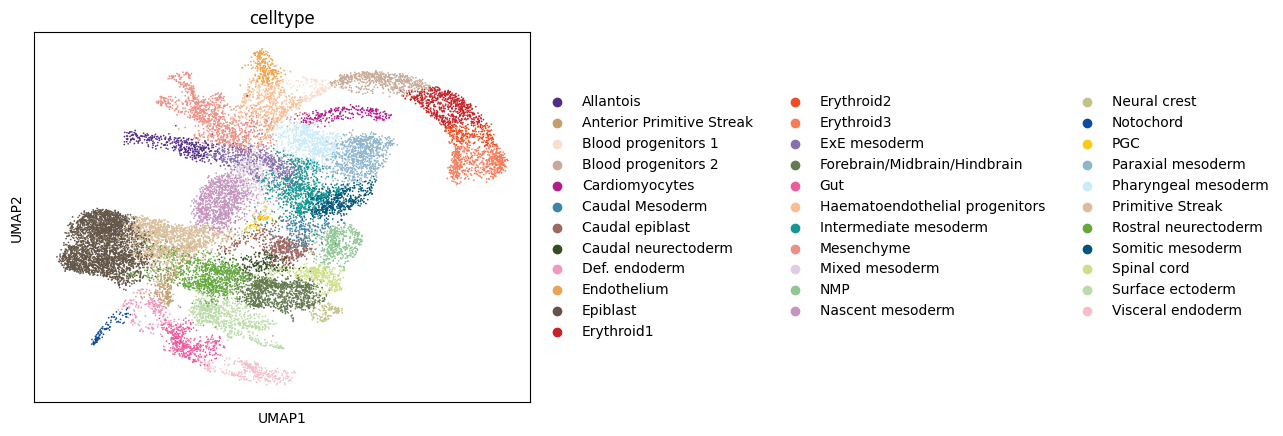

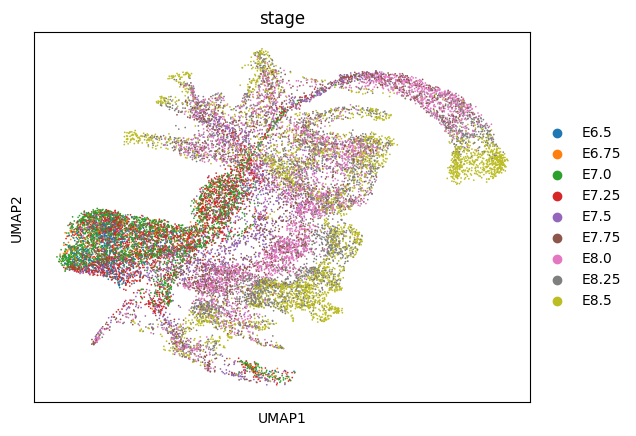

In [16]:
import scanpy as sc

all_colours_new = {
  "Allantois" : "#532C8A",
  "Anterior Primitive Streak" : "#c19f70",
  "Blood progenitors 1" : "#f9decf",
  "Blood progenitors 2" : "#c9a997",
  "Cardiomyocytes" :  "#B51D8D",#
  "Caudal epiblast" : "#9e6762",
  "Caudal Mesoderm" : "#3F84AA",
  "Def. endoderm" : "#F397C0",#
  "Nascent mesoderm" :  "#C594BF",#                 
  "Mixed mesoderm" :  "#DFCDE4",#
  
  "Endothelium" :  "#eda450",#                              
  "Epiblast" :  "#635547",#
  "Erythroid1" :  "#C72228",#                               
  "Erythroid2" :  "#EF4E22",#   
  "Erythroid3" : "#f77b59",
  "ExE ectoderm" :  "#989898",#                            
  
  "ExE endoderm" : "#7F6874",#                     
  "ExE mesoderm" :  "#8870ad",#
  
  "Rostral neurectoderm" :  "#65A83E",#
  "Forebrain/Midbrain/Hindbrain" : "#647a4f",
  
  "Gut" :  "#EF5A9D",#[19] "Foregut"                                     
  "Haematoendothelial progenitors" :  "#FBBE92",#            
  "Caudal neurectoderm": "#354E23",
  
  "Intermediate mesoderm" :  "#139992",#    
  "Neural crest": "#C3C388",
  
  "NMP" :  "#8EC792",#                                    
  "Notochord" :  "#0F4A9C",#                          
  "Paraxial mesoderm" :  "#8DB5CE",#
  "Parietal endoderm" :  "#1A1A1A",                         
  "PGC" :  "#FACB12",                                       
  
  "Pharyngeal mesoderm" :  "#C9EBFB",#                      
  "Primitive Streak" :  "#DABE99",#
  "Mesenchyme" : "#ed8f84",
  "Somitic mesoderm" :  "#005579",#                                  
  "Spinal cord" :  "#CDE088",#                     
  "Surface ectoderm" : "#BBDCA8",#                          
  
  "Visceral endoderm" : "#F6BFCB",#
  "Mes1": "#c4a6b2",#
  "Mes2":"#ca728c",#
  
  "Cardiomyocytes" :  "#B51D8D",
}

adata.uns["%s_colors"%cluster_key] = [all_colours_new[cluster] for cluster in adata.obs[cluster_key].cat.categories]
sc.pl.umap(adata, color=cluster_key)
sc.pl.umap(adata, color=batch_key)

<AxesSubplot: title={'center': 'celltype'}, xlabel='X_umap_transformed_batch1', ylabel='X_umap_transformed_batch2'>

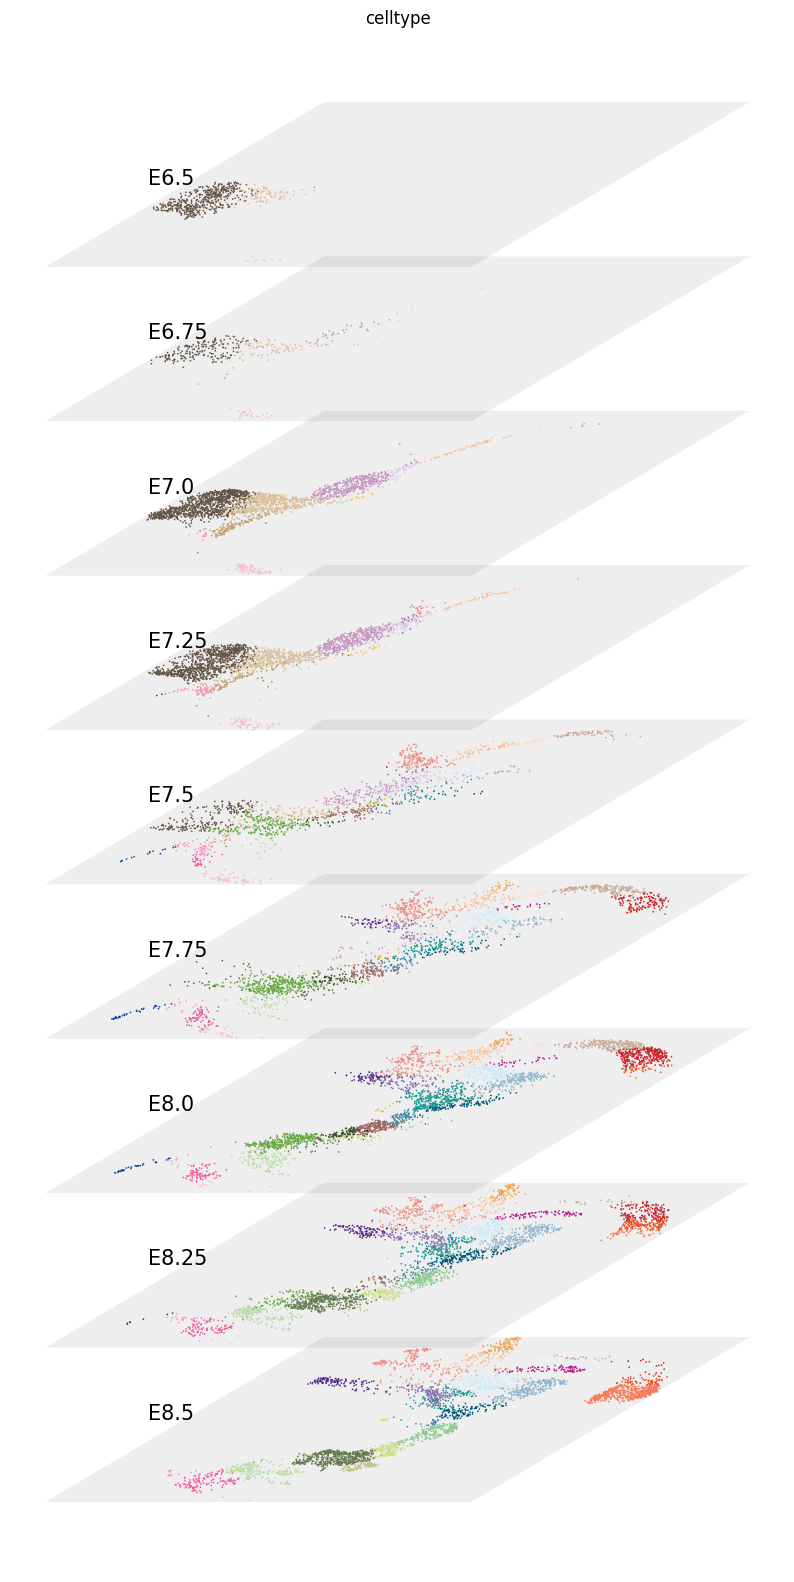

In [17]:
import numpy as np
import matplotlib.pyplot as plt

transform_matrix_params = dict(p=0.5, q=1.5 , theta=np.pi/20) # 转换矩阵参数
sep = 45 # 批次间隔
# embedding_plot_params = dict() # 散点绘图函数
embedding_plot_params = dict(legend_loc=None, frameon=False) # 散点绘图参数

figsize=(10,20)
fig, ax = plt.subplots(figsize=figsize) # 控制画布大小
velovgi.pl.draw_batch_layer_embedding(adata, cluster_key=cluster_key, batch_key=batch_key, transform_matrix_params=transform_matrix_params, sep=sep, embedding_plot_params=embedding_plot_params, ax=ax)

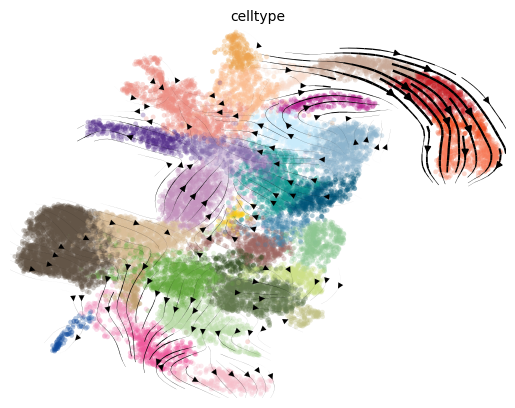

In [24]:
import scvelo as scv

scv.pl.velocity_embedding_stream(adata, color=cluster_key, legend_loc="none")